In [152]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns
import geopandas as gpd
import mapclassify as mc
import contextily

## 1. Create base map and define urban area of Glasgow

In [153]:
# read urban and rural data
urban_datazone=pd.read_csv('Data/SmallUser.csv')

In [154]:
urban_datazone.columns

Index(['Postcode', 'PostcodeDistrict', 'PostcodeSector', 'DateOfIntroduction',
       'DateOfDeletion', 'GridReferenceEasting', 'GridReferenceNorthing',
       'Latitude', 'Longitude', 'SplitIndicator', 'CouncilArea2019Code',
       'UKParliamentaryConstituency2005Code',
       'ScottishParliamentaryRegion2021Code',
       'ScottishParliamentaryConstituency2021Code', 'ElectoralWard2022Code',
       'HealthBoardArea2019Code', 'HealthBoardArea2006Code',
       'HealthBoardArea1995Code', 'IntegrationAuthority2019Code',
       'OutputArea2011Code', 'OutputArea2001Code', 'OutputArea1991Code',
       'DataZone2011Code', 'DataZone2001Code', 'IntermediateZone2011Code',
       'IntermediateZone2001Code', 'CensusHouseholdCount2011',
       'CensusPopulationCount2011', 'CensusHouseholdCount2001',
       'CensusPopulationCount2001', 'CensusHouseholdCount1991',
       'CensusPopulationCount1991',
       'ScottishIndexOfMultipleDeprivation2020Rank', 'LAU2019Level1Code',
       'ITL2021Level2Code', '

In [155]:
# keep useful columns
urban_datazone=urban_datazone[['DataZone2011Code','UrbanRural6Fold2020Code']]

# delete duplicated rows
urban_datazone=urban_datazone.drop_duplicates()

In [156]:
urban_datazone

,DataZone2011Code,UrbanRural6Fold2020Code
0,S01006853,5
7,S01006514,1
12,S01006513,1
16,S01006516,1
25,S01006515,5
...,...,...
193160,S01012409,6
193164,S01012408,6
193212,S01012406,6
193228,S01012411,6


In [157]:
# read files
scot_simd=gpd.read_file('Data/SG_SIMD_2020/SG_SIMD_2020.shp')
gla_boundary=gpd.read_file('Data/GlasgowBdry_2011/GlasgowBdry_2011.shp')


In [158]:
# reproject it to spherical mercato
scot_simd.to_crs(epsg=3857, inplace=True)
gla_boundary.to_crs(epsg=3857, inplace=True)

In [159]:
# select data zones in Glasgow
gla_simd=scot_simd.loc[scot_simd['LAName']=='Glasgow City']

### 1.1 Define urban and rural area

In [160]:
# merge SIMD with urban codes data
gla_simd= gla_simd.merge(urban_datazone, left_on='DataZone',right_on='DataZone2011Code', how='left')

In [161]:
gla_simd['UrbanRural6Fold2020Code'].unique()

array([1, 5])

In [162]:
# the rows increased, which means some data zones are partially in rural area
gla_simd[gla_simd.duplicated('DataZone2011Code')]

,DataZone,DZName,LAName,SAPE2017,WAPE2017,Rankv2,Quintilev2,Decilev2,Vigintilv2,Percentv2,...,HouseNumOC,HouseNumNC,HouseOCrat,HouseNCrat,HouseRank,Shape_Leng,Shape_Area,geometry,DataZone2011Code,UrbanRural6Fold2020Code
10,S01009767,Darnley North - 04,Glasgow City,1099,738,1962,2,3,6,29,...,89,3,17%,1%,1486.0,17004.466933,3.069404e+06,"POLYGON ((-485786.679 7519565.774, -485639.740...",S01009767,1
37,S01009793,Pollok South and West - 02,Glasgow City,1342,867,5229,4,8,15,75,...,97,10,11%,1%,3017.0,5307.901854,1.095028e+06,"POLYGON ((-486355.951 7525018.460, -486366.424...",S01009793,5
217,S01009972,Carmunnock South - 04,Glasgow City,880,512,2098,2,4,7,31,...,101,9,12%,1%,2609.0,20628.646934,4.898133e+06,"POLYGON ((-474123.839 7520598.165, -474111.491...",S01009972,5
225,S01009979,Glenwood South - 07,Glasgow City,518,299,138,1,1,1,2,...,103,4,21%,1%,901.0,3680.176673,3.160827e+05,"POLYGON ((-469794.672 7519279.974, -469791.148...",S01009979,5
335,S01010088,Baillieston East - 01,Glasgow City,1916,1339,5520,4,8,16,80,...,43,8,5%,1%,5292.0,12134.663939,2.504590e+06,"POLYGON ((-454857.341 7529024.492, -454649.963...",S01010088,1
339,S01010091,Baillieston East - 04,Glasgow City,963,699,3917,3,6,12,57,...,101,5,12%,1%,2979.0,10404.213993,2.881871e+06,"POLYGON ((-458391.600 7527095.488, -458423.540...",S01010091,1
358,S01010109,Easterhouse East - 05,Glasgow City,907,649,980,1,2,3,15,...,174,41,24%,6%,380.0,13896.703702,3.668592e+06,"POLYGON ((-454260.509 7535010.353, -454203.179...",S01010109,5
367,S01010117,"Garthamlock, Auchinlea and Gartloch - 05",Glasgow City,1401,990,5019,4,8,15,72,...,80,17,12%,3%,2201.0,22049.305723,5.161941e+06,"POLYGON ((-458093.545 7535826.534, -458024.538...",S01010117,1
373,S01010122,North Barlanark and Easterhouse South - 05,Glasgow City,511,373,5,1,1,1,1,...,105,14,25%,3%,447.5,4359.120819,3.657107e+05,"POLYGON ((-458589.317 7532305.128, -458631.559...",S01010122,5
430,S01010178,Riddrie and Hogganfield - 07,Glasgow City,1067,668,242,1,1,1,4,...,196,21,19%,2%,1051.0,6127.463478,1.075728e+06,"POLYGON ((-464054.633 7534770.712, -463986.843...",S01010178,5


In [163]:
# to ensure that the research is conducted based on urban area, I excluded those data zones have partially been defined as rural
# abtain the code of data zones whose urban areal code are 5

rural_datazone=gla_simd['DataZone'][gla_simd['UrbanRural6Fold2020Code'] == 5].tolist()


In [164]:
gla_simd = gla_simd[~gla_simd['DataZone'].isin(rural_datazone)]

In [165]:
# the number of data zone reduce from 746 to 732
gla_simd.shape

(732, 54)

Text(0.95, 0.84, 'N')

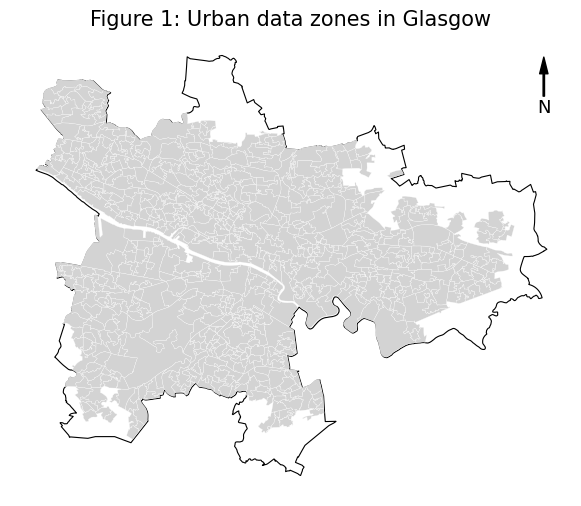

In [166]:
# plot the study area on the map
fig,ax=plt.subplots(figsize=(12,6))
gla_boundary.plot(ax=ax,color='white', edgecolor='black',linewidth=0.8)
gla_simd.plot(ax=ax,color='lightgrey', edgecolor='white',linewidth=0.2)
ax.set_title('Figure 1: Urban data zones in Glasgow', fontsize=15)
ax.set_axis_off()
x, y, arrow_length = 0.95, 0.95, 0.11
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=1, headwidth=6),
            ha='center', va='center', fontsize=13,
            xycoords=ax.transAxes)

### 1.2 Join population data into SIMD dataset

In [167]:
# read population data
population = gpd.read_file('Data/2011-population-cesus/ons-pop-density_4830035/ons-pop-density_4830035.gdb', layer='Output_Area')
population.to_crs(epsg=3857, inplace=True)

In [168]:
population

,area_code,area_name,census_geography,all_residents,area_ha,density,geometry
0,S00125300,None,oa,85,0.05,1700.0,"MULTIPOLYGON (((-447569.924 7531027.942, -4475..."
1,S00125328,None,oa,55,0.03,1833.3,"MULTIPOLYGON (((-441381.610 7512877.709, -4414..."
2,S00125817,None,oa,60,1.21,49.6,"MULTIPOLYGON (((-440798.910 7521580.395, -4406..."
3,S00123222,None,oa,128,1667.44,0.1,"MULTIPOLYGON (((-451094.033 7541435.560, -4507..."
4,S00130939,None,oa,97,1.45,66.9,"MULTIPOLYGON (((-452404.221 7493719.289, -4525..."
...,...,...,...,...,...,...,...
14125,S00128577,None,oa,90,5.07,17.8,"MULTIPOLYGON (((-494924.346 7528447.032, -4949..."
14126,S00128454,None,oa,119,331.22,0.4,"MULTIPOLYGON (((-490837.027 7534671.335, -4908..."
14127,S00130351,None,oa,127,2.35,54.0,"MULTIPOLYGON (((-469801.704 7524273.239, -4696..."
14128,S00132497,None,oa,62,103.55,0.6,"MULTIPOLYGON (((-472503.154 7512515.210, -4724..."


In [169]:
population.columns

Index(['area_code', 'area_name', 'census_geography', 'all_residents',
       'area_ha', 'density', 'geometry'],
      dtype='object')

Text(0.95, 0.84, 'N')

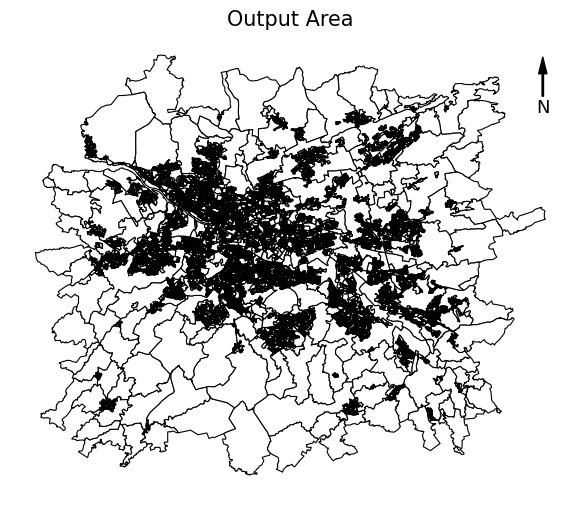

In [170]:
fig,ax=plt.subplots(figsize=(12,6))
population.plot(ax=ax,color='white', edgecolor='black',linewidth=0.8)

ax.set_title('Output Area', fontsize=15)
ax.set_axis_off()
x, y, arrow_length = 0.95, 0.95, 0.11
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=1, headwidth=6),
            ha='center', va='center', fontsize=13,
            xycoords=ax.transAxes)

In [171]:
# Join the population data with SIMD dataset within Glasgow boundary
gla_simd_oa=gpd.sjoin(population[['all_residents','area_ha', 'density','geometry']],gla_simd,lsuffix='OA', rsuffix='DZ' ,op='within')

In [172]:
gla_simd_oa

,all_residents,area_ha,density,geometry,index_DZ,DataZone,DZName,LAName,SAPE2017,WAPE2017,...,CrimeRank,HouseNumOC,HouseNumNC,HouseOCrat,HouseNCrat,HouseRank,Shape_Leng,Shape_Area,DataZone2011Code,UrbanRural6Fold2020Code
5,56,0.04,1400.0,"MULTIPOLYGON (((-478041.925 7535912.795, -4780...",617,S01010362,Wyndford - 05,Glasgow City,831,645,...,71.0,250,77,32%,10%,92.0,1366.469820,80326.479612,S01010362,1
372,83,0.60,138.3,"MULTIPOLYGON (((-477812.746 7536057.997, -4777...",617,S01010362,Wyndford - 05,Glasgow City,831,645,...,71.0,250,77,32%,10%,92.0,1366.469820,80326.479612,S01010362,1
1093,100,0.28,357.1,"MULTIPOLYGON (((-477855.521 7536163.617, -4778...",617,S01010362,Wyndford - 05,Glasgow City,831,645,...,71.0,250,77,32%,10%,92.0,1366.469820,80326.479612,S01010362,1
3947,116,3.76,30.9,"MULTIPOLYGON (((-477762.928 7535897.314, -4777...",617,S01010362,Wyndford - 05,Glasgow City,831,645,...,71.0,250,77,32%,10%,92.0,1366.469820,80326.479612,S01010362,1
5389,53,1.27,41.7,"MULTIPOLYGON (((-478083.574 7536011.531, -4782...",617,S01010362,Wyndford - 05,Glasgow City,831,645,...,71.0,250,77,32%,10%,92.0,1366.469820,80326.479612,S01010362,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7812,50,0.25,200.0,"MULTIPOLYGON (((-480377.268 7532188.849, -4803...",647,S01010392,Glasgow Harbour and Partick South - 05,Glasgow City,1015,806,...,4584.0,145,2,21%,0%,1028.5,1440.220583,70579.603590,S01010392,1
7813,99,0.32,309.4,"MULTIPOLYGON (((-480250.516 7532096.865, -4801...",647,S01010392,Glasgow Harbour and Partick South - 05,Glasgow City,1015,806,...,4584.0,145,2,21%,0%,1028.5,1440.220583,70579.603590,S01010392,1
7814,66,0.21,314.3,"MULTIPOLYGON (((-480218.229 7532153.615, -4802...",647,S01010392,Glasgow Harbour and Partick South - 05,Glasgow City,1015,806,...,4584.0,145,2,21%,0%,1028.5,1440.220583,70579.603590,S01010392,1
7898,78,0.17,458.8,"MULTIPOLYGON (((-480326.619 7532165.041, -4803...",647,S01010392,Glasgow Harbour and Partick South - 05,Glasgow City,1015,806,...,4584.0,145,2,21%,0%,1028.5,1440.220583,70579.603590,S01010392,1


Text(0.95, 0.84, 'N')

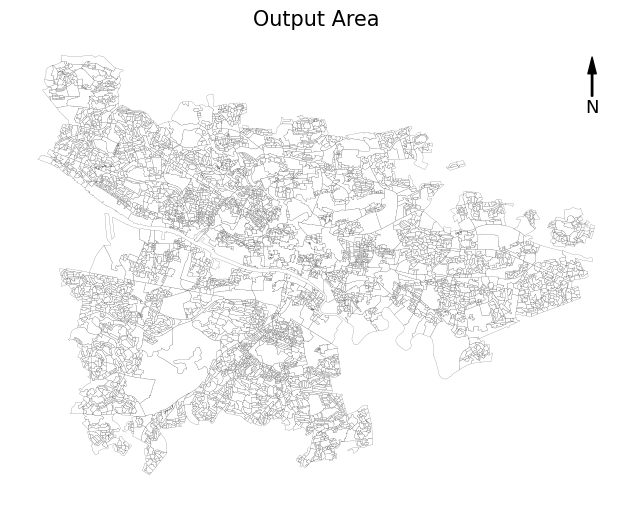

In [173]:
# combined population census data with SIMD data
fig,ax=plt.subplots(figsize=(12,6))
gla_simd_oa.plot(ax=ax,color='white', edgecolor='black',linewidth=0.1)

ax.set_title('Output Area', fontsize=15)
ax.set_axis_off()
x, y, arrow_length = 0.95, 0.95, 0.11
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=1, headwidth=6),
            ha='center', va='center', fontsize=13,
            xycoords=ax.transAxes)

### 1.3 Load residential buildings on map

In [174]:
buildings=gpd.read_file('Data/Verisk/ukbuildings_4686966/ukbuildings_4686966.gdb')
buildings.to_crs(epsg=3857, inplace=True)

In [175]:
# filter residential buildings
residential_use=['RESIDENTIAL ONLY','COMMUNITY - INSTITUTIONAL AND COMMUNAL ACCOMMODATION','RESIDENTIAL WITH RETAIL ON GROUND FLOOR']
residential_buildings=buildings[buildings['use'].isin(residential_use)]

In [176]:
residential_buildings = residential_buildings[['use','geometry']]

Text(0.95, 0.84, 'N')

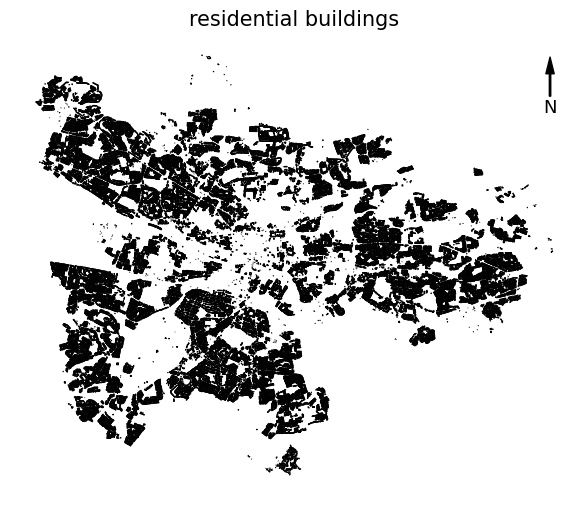

In [177]:
# combined population census data with SIMD data
fig,ax=plt.subplots(figsize=(12,6))
residential_buildings.plot(ax=ax,color='white', edgecolor='black',linewidth=0.8)

ax.set_title('residential buildings', fontsize=15)
ax.set_axis_off()
x, y, arrow_length = 0.95, 0.95, 0.11
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=1, headwidth=6),
            ha='center', va='center', fontsize=13,
            xycoords=ax.transAxes)

In [178]:
residential_buildings

,use,geometry
0,RESIDENTIAL ONLY,"MULTIPOLYGON (((-483428.849 7518664.569, -4834..."
1,RESIDENTIAL ONLY,"MULTIPOLYGON (((-467603.083 7537381.600, -4676..."
2,RESIDENTIAL ONLY,"MULTIPOLYGON (((-473318.817 7520619.648, -4733..."
3,RESIDENTIAL ONLY,"MULTIPOLYGON (((-473197.925 7521322.424, -4732..."
4,RESIDENTIAL ONLY,"MULTIPOLYGON (((-458821.369 7530132.882, -4588..."
...,...,...
153743,COMMUNITY - INSTITUTIONAL AND COMMUNAL ACCOMMO...,"MULTIPOLYGON (((-457712.806 7528857.442, -4576..."
153765,COMMUNITY - INSTITUTIONAL AND COMMUNAL ACCOMMO...,"MULTIPOLYGON (((-479956.854 7538923.801, -4799..."
153787,COMMUNITY - INSTITUTIONAL AND COMMUNAL ACCOMMO...,"MULTIPOLYGON (((-476242.615 7523611.199, -4762..."
154227,COMMUNITY - INSTITUTIONAL AND COMMUNAL ACCOMMO...,"MULTIPOLYGON (((-457845.444 7528783.039, -4578..."


In [179]:
# generate centroid for residential buildings

residential_buildings['center']=residential_buildings.geometry.centroid

In [180]:
residential_buildings

,use,geometry,center
0,RESIDENTIAL ONLY,"MULTIPOLYGON (((-483428.849 7518664.569, -4834...",POINT (-483428.455 7518675.862)
1,RESIDENTIAL ONLY,"MULTIPOLYGON (((-467603.083 7537381.600, -4676...",POINT (-467605.325 7537390.422)
2,RESIDENTIAL ONLY,"MULTIPOLYGON (((-473318.817 7520619.648, -4733...",POINT (-473320.293 7520610.943)
3,RESIDENTIAL ONLY,"MULTIPOLYGON (((-473197.925 7521322.424, -4732...",POINT (-473206.037 7521320.610)
4,RESIDENTIAL ONLY,"MULTIPOLYGON (((-458821.369 7530132.882, -4588...",POINT (-458831.259 7530130.349)
...,...,...,...
153743,COMMUNITY - INSTITUTIONAL AND COMMUNAL ACCOMMO...,"MULTIPOLYGON (((-457712.806 7528857.442, -4576...",POINT (-457708.252 7528846.537)
153765,COMMUNITY - INSTITUTIONAL AND COMMUNAL ACCOMMO...,"MULTIPOLYGON (((-479956.854 7538923.801, -4799...",POINT (-479969.415 7538916.892)
153787,COMMUNITY - INSTITUTIONAL AND COMMUNAL ACCOMMO...,"MULTIPOLYGON (((-476242.615 7523611.199, -4762...",POINT (-476257.083 7523613.889)
154227,COMMUNITY - INSTITUTIONAL AND COMMUNAL ACCOMMO...,"MULTIPOLYGON (((-457845.444 7528783.039, -4578...",POINT (-457864.829 7528785.496)


In [181]:
residential_buildings_center=residential_buildings[['use','center']]

In [182]:
residential_buildings_center=residential_buildings_center.set_geometry('center')

Text(0.95, 0.84, 'N')

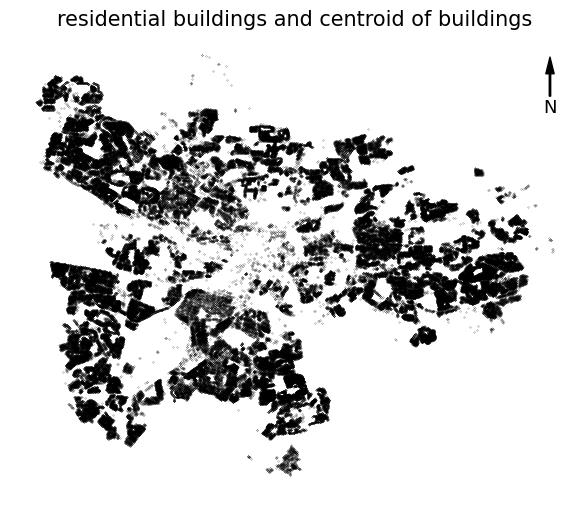

In [183]:
# combined population census data with SIMD data
fig,ax=plt.subplots(figsize=(12,6))
residential_buildings_center.plot(ax=ax,color='black',marker='.',markersize=0.1)

ax.set_title('residential buildings and centroid of buildings', fontsize=15)
ax.set_axis_off()
x, y, arrow_length = 0.95, 0.95, 0.11
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=1, headwidth=6),
            ha='center', va='center', fontsize=13,
            xycoords=ax.transAxes)

In [184]:
residential_buildings_center

,use,center
0,RESIDENTIAL ONLY,POINT (-483428.455 7518675.862)
1,RESIDENTIAL ONLY,POINT (-467605.325 7537390.422)
2,RESIDENTIAL ONLY,POINT (-473320.293 7520610.943)
3,RESIDENTIAL ONLY,POINT (-473206.037 7521320.610)
4,RESIDENTIAL ONLY,POINT (-458831.259 7530130.349)
...,...,...
153743,COMMUNITY - INSTITUTIONAL AND COMMUNAL ACCOMMO...,POINT (-457708.252 7528846.537)
153765,COMMUNITY - INSTITUTIONAL AND COMMUNAL ACCOMMO...,POINT (-479969.415 7538916.892)
153787,COMMUNITY - INSTITUTIONAL AND COMMUNAL ACCOMMO...,POINT (-476257.083 7523613.889)
154227,COMMUNITY - INSTITUTIONAL AND COMMUNAL ACCOMMO...,POINT (-457864.829 7528785.496)


In [185]:
# join residential building with output area and simd dataset
gla_simd_oa_resi=gpd.sjoin(residential_buildings_center,gla_simd_oa,how='inner',lsuffix='R', rsuffix='OA',op='within')

In [186]:
gla_simd_oa_resi.shape

(135560, 60)

In [187]:
gla_simd_oa_resi

,use,center,index_OA,all_residents,area_ha,density,index_DZ,DataZone,DZName,LAName,...,CrimeRank,HouseNumOC,HouseNumNC,HouseOCrat,HouseNCrat,HouseRank,Shape_Leng,Shape_Area,DataZone2011Code,UrbanRural6Fold2020Code
1,RESIDENTIAL ONLY,POINT (-467605.325 7537390.422),4879,76,2.78,27.3,449,S01010196,Balornock - 03,Glasgow City,...,1943.0,129,11,19%,2%,1155.0,2793.163680,345598.156621,S01010196,1
11375,RESIDENTIAL ONLY,POINT (-467781.986 7537103.662),4879,76,2.78,27.3,449,S01010196,Balornock - 03,Glasgow City,...,1943.0,129,11,19%,2%,1155.0,2793.163680,345598.156621,S01010196,1
11580,RESIDENTIAL ONLY,POINT (-467364.676 7537599.318),4879,76,2.78,27.3,449,S01010196,Balornock - 03,Glasgow City,...,1943.0,129,11,19%,2%,1155.0,2793.163680,345598.156621,S01010196,1
16578,RESIDENTIAL ONLY,POINT (-467330.604 7537614.008),4879,76,2.78,27.3,449,S01010196,Balornock - 03,Glasgow City,...,1943.0,129,11,19%,2%,1155.0,2793.163680,345598.156621,S01010196,1
18100,RESIDENTIAL ONLY,POINT (-467788.821 7537092.552),4879,76,2.78,27.3,449,S01010196,Balornock - 03,Glasgow City,...,1943.0,129,11,19%,2%,1155.0,2793.163680,345598.156621,S01010196,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151130,COMMUNITY - INSTITUTIONAL AND COMMUNAL ACCOMMO...,POINT (-474337.044 7534119.634),4567,76,11.95,6.4,566,S01010313,Keppochhill - 05,Glasgow City,...,1656.0,155,37,24%,6%,354.0,3004.512831,189812.632999,S01010313,1
151712,RESIDENTIAL WITH RETAIL ON GROUND FLOOR,POINT (-473032.573 7530339.834),7879,55,0.34,161.8,518,S01010265,City Centre East - 07,Glasgow City,...,137.0,391,59,45%,7%,21.0,1727.997581,68584.296366,S01010265,1
152412,RESIDENTIAL WITH RETAIL ON GROUND FLOOR,POINT (-473540.480 7529744.375),584,76,0.09,844.4,527,S01010274,City Centre South - 03,Glasgow City,...,3.0,142,13,26%,2%,400.0,3547.089132,233139.344025,S01010274,1
152769,RESIDENTIAL WITH RETAIL ON GROUND FLOOR,POINT (-481291.382 7536485.171),6736,110,3.25,33.8,724,S01010469,Anniesland East - 05,Glasgow City,...,683.0,188,58,34%,10%,70.0,2338.595605,129082.943765,S01010469,1


In [188]:
# check the relation among datazone, output area and residential buildings
gla_simd_oa_resi[gla_simd_oa_resi['index_OA']==4715]

,use,center,index_OA,all_residents,area_ha,density,index_DZ,DataZone,DZName,LAName,...,CrimeRank,HouseNumOC,HouseNumNC,HouseOCrat,HouseNCrat,HouseRank,Shape_Leng,Shape_Area,DataZone2011Code,UrbanRural6Fold2020Code
492,RESIDENTIAL ONLY,POINT (-481542.313 7518452.111),4715,135,1.99,67.8,0,S01009758,Darnley East - 01,Glasgow City,...,5523.0,73,43,13%,8%,1021.0,1474.152028,78490.309008,S01009758,1
3081,RESIDENTIAL ONLY,POINT (-481583.498 7518517.783),4715,135,1.99,67.8,0,S01009758,Darnley East - 01,Glasgow City,...,5523.0,73,43,13%,8%,1021.0,1474.152028,78490.309008,S01009758,1
4857,RESIDENTIAL ONLY,POINT (-481665.775 7518383.766),4715,135,1.99,67.8,0,S01009758,Darnley East - 01,Glasgow City,...,5523.0,73,43,13%,8%,1021.0,1474.152028,78490.309008,S01009758,1
9272,RESIDENTIAL ONLY,POINT (-481566.510 7518541.698),4715,135,1.99,67.8,0,S01009758,Darnley East - 01,Glasgow City,...,5523.0,73,43,13%,8%,1021.0,1474.152028,78490.309008,S01009758,1
13673,RESIDENTIAL ONLY,POINT (-481512.622 7518554.153),4715,135,1.99,67.8,0,S01009758,Darnley East - 01,Glasgow City,...,5523.0,73,43,13%,8%,1021.0,1474.152028,78490.309008,S01009758,1
16263,RESIDENTIAL ONLY,POINT (-481567.310 7518435.041),4715,135,1.99,67.8,0,S01009758,Darnley East - 01,Glasgow City,...,5523.0,73,43,13%,8%,1021.0,1474.152028,78490.309008,S01009758,1
18719,RESIDENTIAL ONLY,POINT (-481505.291 7518548.849),4715,135,1.99,67.8,0,S01009758,Darnley East - 01,Glasgow City,...,5523.0,73,43,13%,8%,1021.0,1474.152028,78490.309008,S01009758,1
19612,RESIDENTIAL ONLY,POINT (-481559.240 7518444.574),4715,135,1.99,67.8,0,S01009758,Darnley East - 01,Glasgow City,...,5523.0,73,43,13%,8%,1021.0,1474.152028,78490.309008,S01009758,1
19766,RESIDENTIAL ONLY,POINT (-481806.418 7518470.049),4715,135,1.99,67.8,0,S01009758,Darnley East - 01,Glasgow City,...,5523.0,73,43,13%,8%,1021.0,1474.152028,78490.309008,S01009758,1
19928,RESIDENTIAL ONLY,POINT (-481636.667 7518432.754),4715,135,1.99,67.8,0,S01009758,Darnley East - 01,Glasgow City,...,5523.0,73,43,13%,8%,1021.0,1474.152028,78490.309008,S01009758,1


Text(0.95, 0.84, 'N')

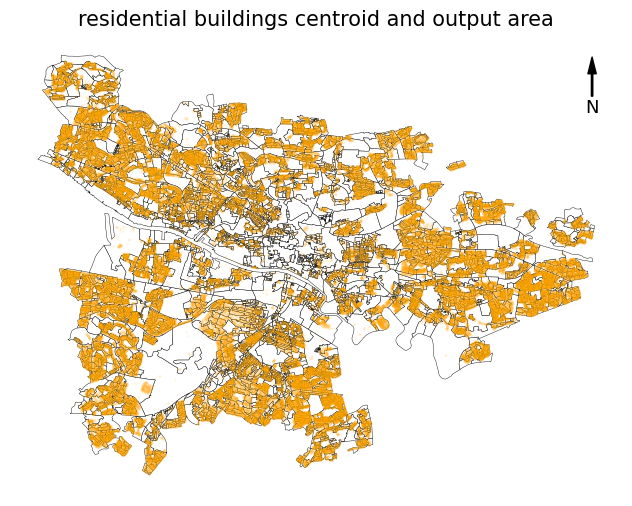

In [189]:
# demonstrate all the data on the map
fig,ax=plt.subplots(figsize=(12,6))
gla_simd_oa.plot(ax=ax,color='white', edgecolor='black',linewidth=0.3)
gla_simd_oa_resi.plot(ax=ax,color='orange',marker='.',markersize=0.1,alpha=0.5)

ax.set_title('residential buildings centroid and output area', fontsize=15)
ax.set_axis_off()
x, y, arrow_length = 0.95, 0.95, 0.11
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=1, headwidth=6),
            ha='center', va='center', fontsize=13,
            xycoords=ax.transAxes)

### 1.4 Load amenities data

In [209]:
poi=gpd.read_file('Data/poi_2023_03/poi_5108594.gdb')

In [210]:
poi['classname'].value_counts()

classname
Convenience Stores and Independent Supermarkets            1726
First, Primary and Infant Schools                           442
Bakeries                                                    309
Grocers, Farm Shops and Pick Your Own                       236
Supermarket Chains                                          219
Butchers                                                    174
Alcoholic Drinks Including Off Licences and Wholesalers     171
Broad Age Range and Secondary State Schools                  92
Frozen Foods                                                 85
Delicatessens                                                71
Special Schools and Colleges                                 60
Confectioners                                                54
Organic, Health, Gourmet and Kosher Foods                    46
Cash and Carry                                               39
Fishmongers                                                  21
Higher Education Establishment

In [211]:
# filter and seperate groceries data and primary schoold data
primary_scool = poi[poi['classname']=='First, Primary and Infant Schools']
groceries = poi[poi['classname'].isin(['Convenience Stores and Independent Supermarkets','Supermarket Chains'])]

In [212]:
# load other data
GP = gpd.read_file('Data/GP-practices_2020_09')
park = gpd.read_file('Data/open-greenspace_2023_04/GB_AccessPoint.shp')
Pharmacies = gpd.read_file('Data/pharmacies_2020_09')

primary_scool.to_crs(epsg=3857, inplace=True)
groceries.to_crs(epsg=3857, inplace=True)
GP.to_crs(epsg=3857, inplace=True)
park.to_crs(epsg=3857, inplace=True)
Pharmacies.to_crs(epsg=3857, inplace=True)

In [213]:
gla_simd_oa.columns

Index(['all_residents', 'area_ha', 'density', 'geometry', 'index_DZ',
       'DataZone', 'DZName', 'LAName', 'SAPE2017', 'WAPE2017', 'Rankv2',
       'Quintilev2', 'Decilev2', 'Vigintilv2', 'Percentv2', 'IncRate',
       'IncNumDep', 'IncRankv2', 'EmpRate', 'EmpNumDep', 'EmpRank', 'HlthCIF',
       'HlthAlcSR', 'HlthDrugSR', 'HlthSMR', 'HlthDprsPc', 'HlthLBWTPc',
       'HlthEmergS', 'HlthRank', 'EduAttend', 'EduAttain', 'EduNoQuals',
       'EduPartici', 'EduUniver', 'EduRank', 'GAccPetrol', 'GAccDTGP',
       'GAccDTPost', 'GAccDTPsch', 'GAccDTSsch', 'GAccDTRet', 'GAccPTGP',
       'GAccPTPost', 'GAccPTRet', 'GAccBrdbnd', 'GAccRank', 'CrimeCount',
       'CrimeRate', 'CrimeRank', 'HouseNumOC', 'HouseNumNC', 'HouseOCrat',
       'HouseNCrat', 'HouseRank', 'Shape_Leng', 'Shape_Area',
       'DataZone2011Code', 'UrbanRural6Fold2020Code'],
      dtype='object')

In [214]:
# select point within glasgow boundary
primary_scool_gla=gpd.sjoin(primary_scool,gla_boundary[['geometry']], how='inner', rsuffix='gla',op='within')
groceries_gla=gpd.sjoin(groceries,gla_boundary[['geometry']], how='inner', rsuffix='gla',op='within')
GP_gla=gpd.sjoin(GP,gla_boundary[['geometry']], how='inner', rsuffix='gla',op='within')
park_gla=gpd.sjoin(park,gla_boundary[['geometry']], how='inner', rsuffix='gla',op='within')
Pharmacies_gla=gpd.sjoin(Pharmacies,gla_boundary[['geometry']], how='inner', rsuffix='gla',op='within')

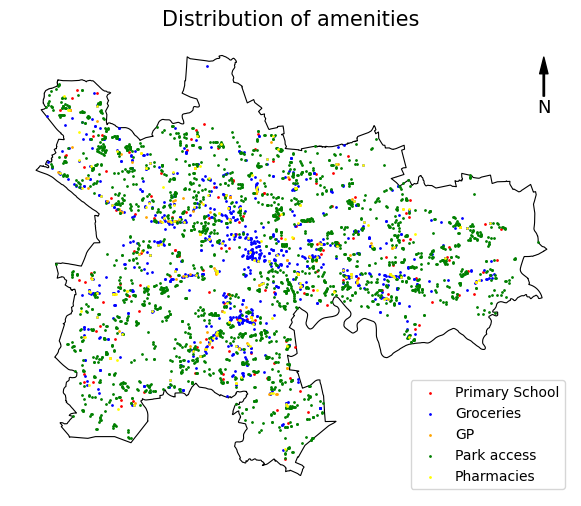

In [215]:

fig,ax=plt.subplots(figsize=(12,6))
gla_boundary.plot(ax=ax,color='white', edgecolor='black',linewidth=0.8)
# edges.plot(ax=ax, edgecolor='black',linewidth=0.1,alpha=0.5)
primary_scool_gla.plot(ax=ax, color="red", markersize=1)
groceries_gla.plot(ax=ax, color="blue", markersize=1)
GP_gla.plot(ax=ax, color="orange", markersize=1)
park_gla.plot(ax=ax, color="green", markersize=1)
Pharmacies_gla.plot(ax=ax, color="yellow", markersize=1)
# buffered_polygon.plot(ax=ax,color='blue',alpha=0.3)
ax.set_title('Distribution of amenities', fontsize=15)
ax.set_axis_off()
x, y, arrow_length = 0.95, 0.95, 0.11
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=1, headwidth=6),
            ha='center', va='center', fontsize=13,
            xycoords=ax.transAxes)
ax.legend(['Primary School', 'Groceries', 'GP', 'Park access', 'Pharmacies'], loc='lower right')


In [216]:
# aggregate amanities data into one dataframe
amenities = pd.concat([primary_scool_gla,groceries_gla,GP_gla,park_gla,Pharmacies_gla],
                      ignore_index=False,
                      keys=['primary_school','groceries','GP','park','Pharmacies'])

In [217]:
amenities

ref_no                            name pointx_class   
primary_school 99   43502406.0  St Rose of Lima Primary School     05310375  \
               100  43502407.0     St Saviour's Primary School     05310375   
               101  43502408.0       St Clare's Primary School     05310375   
               102  43502409.0     St Stephen's Primary School     05310375   
               103  43502410.0       St Thomas' Primary School     05310375   
...                        ...                             ...          ...   
Pharmacies     732         NaN                             NaN          NaN   
               733         NaN                             NaN          NaN   
               734         NaN                             NaN          NaN   
               735         NaN                             NaN          NaN   
               736         NaN                             NaN          NaN   

                               groupname   
primary_school 99   Education and Health  \
               100  Education and Health   
               101  Education and Health   
               102  Education and Health   
               103  Education and Health   
...                                  ...   
Pharmacies     732                   NaN   
               733                   NaN   
               734                   NaN   
               735                   NaN   
               736                   NaN   

                                                 categoryname   
primary_school 99   Primary, Secondary and Tertiary Education  \
               100  Primary, Secondary and Tertiary Education   
               101  Primary, Secondary and Tertiary Education   
               102  Primary, Secondary and Tertiary Education   
               103  Primary, Secondary and Tertiary Education   
...                                                       ...   
Pharmacies     732                                        NaN   
               733                                        NaN   
               734                                        NaN   
               735                                        NaN   
               736                                        NaN   

                                            classname  feature_easting   
primary_school 99   First, Primary and Infant Schools         265073.0  \
               100  First, Primary and Infant Schools         255794.0   
               101  First, Primary and Infant Schools         252157.9   
               102  First, Primary and Infant Schools         259937.3   
               103  First, Primary and Infant Schools         262979.0   
...                                               ...              ...   
Pharmacies     732                                NaN              NaN   
               733                                NaN              NaN   
               734                                NaN              NaN   
               735                                NaN              NaN   
               736                                NaN              NaN   

                    feature_northing  pos_accuracy            uprn  ...   
primary_school 99           666484.0           1.0    906700418276  ...  \
               100          665467.0           1.0            None  ...   
               101          671878.2           1.0    906700430730  ...   
               102          666721.9           1.0    906700530381  ...   
               103          665936.0           1.0    906700105553  ...   
...                              ...           ...             ...  ...   
Pharmacies     732               NaN           NaN  906700115012.0  ...   
               733               NaN           NaN  906700197641.0  ...   
               734               NaN           NaN  906700041032.0  ...   
               735               NaN           NaN  906700248145.0  ...   
               736               NaN           NaN 

In [218]:
amenities.reset_index(inplace=True)

In [219]:
amenities.rename(columns={'level_0': 'category','level_1':'index_ori'}, inplace=True)

## 2. Compute travel time for one output area

### 2.1 Choose one OA as example

In [426]:
gdf=gla_simd_oa_resi[gla_simd_oa_resi['index_OA']==4879]

In [191]:
gdf.head()

,use,center,index_OA,all_residents,area_ha,density,index_DZ,DataZone,DZName,LAName,...,CrimeRank,HouseNumOC,HouseNumNC,HouseOCrat,HouseNCrat,HouseRank,Shape_Leng,Shape_Area,DataZone2011Code,UrbanRural6Fold2020Code
1,RESIDENTIAL ONLY,POINT (-467605.325 7537390.422),4879,76,2.78,27.3,449,S01010196,Balornock - 03,Glasgow City,...,1943.0,129,11,19%,2%,1155.0,2793.16368,345598.156621,S01010196,1
11375,RESIDENTIAL ONLY,POINT (-467781.986 7537103.662),4879,76,2.78,27.3,449,S01010196,Balornock - 03,Glasgow City,...,1943.0,129,11,19%,2%,1155.0,2793.16368,345598.156621,S01010196,1
11580,RESIDENTIAL ONLY,POINT (-467364.676 7537599.318),4879,76,2.78,27.3,449,S01010196,Balornock - 03,Glasgow City,...,1943.0,129,11,19%,2%,1155.0,2793.16368,345598.156621,S01010196,1
16578,RESIDENTIAL ONLY,POINT (-467330.604 7537614.008),4879,76,2.78,27.3,449,S01010196,Balornock - 03,Glasgow City,...,1943.0,129,11,19%,2%,1155.0,2793.16368,345598.156621,S01010196,1
18100,RESIDENTIAL ONLY,POINT (-467788.821 7537092.552),4879,76,2.78,27.3,449,S01010196,Balornock - 03,Glasgow City,...,1943.0,129,11,19%,2%,1155.0,2793.16368,345598.156621,S01010196,1


Text(0.95, 0.84, 'N')

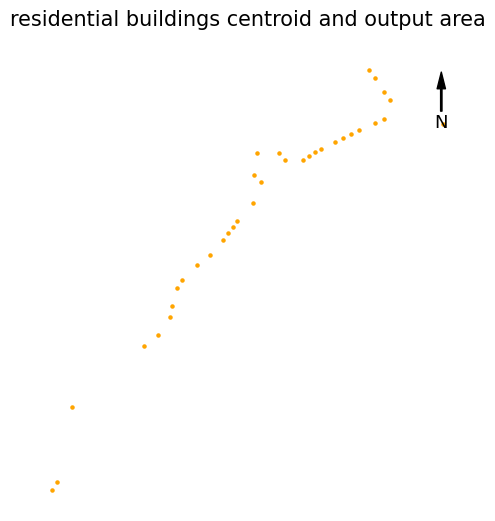

In [192]:
# demonstrate all the data on the map
fig,ax=plt.subplots(figsize=(12,6))
gdf.plot(ax=ax,color='orange',marker='.',markersize=20)

ax.set_title('residential buildings centroid and output area', fontsize=15)
ax.set_axis_off()
x, y, arrow_length = 0.95, 0.95, 0.11
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=1, headwidth=6),
            ha='center', va='center', fontsize=13,
            xycoords=ax.transAxes)

In [193]:
gdf['x'] = gdf.geometry.x
gdf['y'] = gdf.geometry.y


In [194]:
gdf

,use,center,index_OA,all_residents,area_ha,density,index_DZ,DataZone,DZName,LAName,...,HouseNumNC,HouseOCrat,HouseNCrat,HouseRank,Shape_Leng,Shape_Area,DataZone2011Code,UrbanRural6Fold2020Code,x,y
1,RESIDENTIAL ONLY,POINT (-467605.325 7537390.422),4879,76,2.78,27.3,449,S01010196,Balornock - 03,Glasgow City,...,11,19%,2%,1155.0,2793.16368,345598.156621,S01010196,1,-467605.325306,7.537390e+06
11375,RESIDENTIAL ONLY,POINT (-467781.986 7537103.662),4879,76,2.78,27.3,449,S01010196,Balornock - 03,Glasgow City,...,11,19%,2%,1155.0,2793.16368,345598.156621,S01010196,1,-467781.985806,7.537104e+06
11580,RESIDENTIAL ONLY,POINT (-467364.676 7537599.318),4879,76,2.78,27.3,449,S01010196,Balornock - 03,Glasgow City,...,11,19%,2%,1155.0,2793.16368,345598.156621,S01010196,1,-467364.675916,7.537599e+06
16578,RESIDENTIAL ONLY,POINT (-467330.604 7537614.008),4879,76,2.78,27.3,449,S01010196,Balornock - 03,Glasgow City,...,11,19%,2%,1155.0,2793.16368,345598.156621,S01010196,1,-467330.604441,7.537614e+06
18100,RESIDENTIAL ONLY,POINT (-467788.821 7537092.552),4879,76,2.78,27.3,449,S01010196,Balornock - 03,Glasgow City,...,11,19%,2%,1155.0,2793.16368,345598.156621,S01010196,1,-467788.820592,7.537093e+06
19471,RESIDENTIAL ONLY,POINT (-467546.536 7537448.552),4879,76,2.78,27.3,449,S01010196,Balornock - 03,Glasgow City,...,11,19%,2%,1155.0,2793.16368,345598.156621,S01010196,1,-467546.536216,7.537449e+06
22216,RESIDENTIAL ONLY,POINT (-467492.065 7537530.813),4879,76,2.78,27.3,449,S01010196,Balornock - 03,Glasgow City,...,11,19%,2%,1155.0,2793.16368,345598.156621,S01010196,1,-467492.064952,7.537531e+06
35511,RESIDENTIAL ONLY,POINT (-467432.203 7537561.973),4879,76,2.78,27.3,449,S01010196,Balornock - 03,Glasgow City,...,11,19%,2%,1155.0,2793.16368,345598.156621,S01010196,1,-467432.202944,7.537562e+06
41511,RESIDENTIAL ONLY,POINT (-467309.043 7537646.898),4879,76,2.78,27.3,449,S01010196,Balornock - 03,Glasgow City,...,11,19%,2%,1155.0,2793.16368,345598.156621,S01010196,1,-467309.043115,7.537647e+06
45410,RESIDENTIAL ONLY,POINT (-467501.683 7537540.510),4879,76,2.78,27.3,449,S01010196,Balornock - 03,Glasgow City,...,11,19%,2%,1155.0,2793.16368,345598.156621,S01010196,1,-467501.682560,7.537541e+06


In [195]:
# test the distance of residential buildings and the potential BDSCAN paramater of 'epsilon'
gdf['buffer'] = gdf.geometry.buffer(100) # 100 meter seems the proper distance 

Text(0.95, 0.84, 'N')

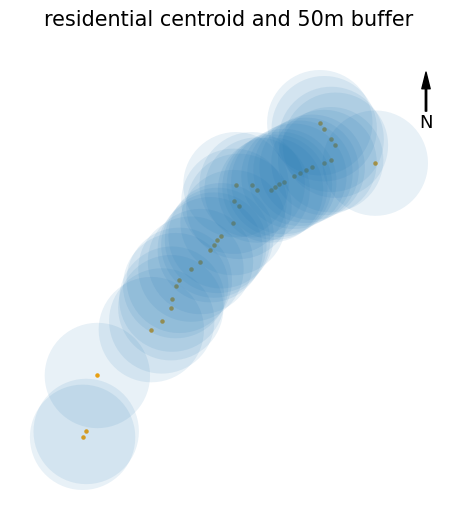

In [196]:
fig, ax = plt.subplots(figsize=(12, 6))
gdf.plot(ax=ax, color='orange', marker='.', markersize=20)

# Plot the buffer polygons
gdf['buffer'].plot(ax=ax, alpha=0.1)

ax.set_title('residential centroid and 50m buffer', fontsize=15)
ax.set_axis_off()
x, y, arrow_length = 0.95, 0.95, 0.11
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=1, headwidth=6),
            ha='center', va='center', fontsize=13,
            xycoords=ax.transAxes)

### 2.2 DBSCAN test in single OA

In [197]:
from sklearn.cluster import DBSCAN

In [198]:
long_lat = gdf[['x', 'y']]

X = long_lat.to_numpy()

In [199]:

dbscan_cluster_model = DBSCAN(eps=100, min_samples=1).fit(X)
dbscan_cluster_model

DBSCAN(eps=100, min_samples=1)

In [200]:
gdf['cluster'] = dbscan_cluster_model.labels_

In [201]:
gdf['cluster'].value_counts()

cluster
0    33
1     2
2     1
Name: count, dtype: int64

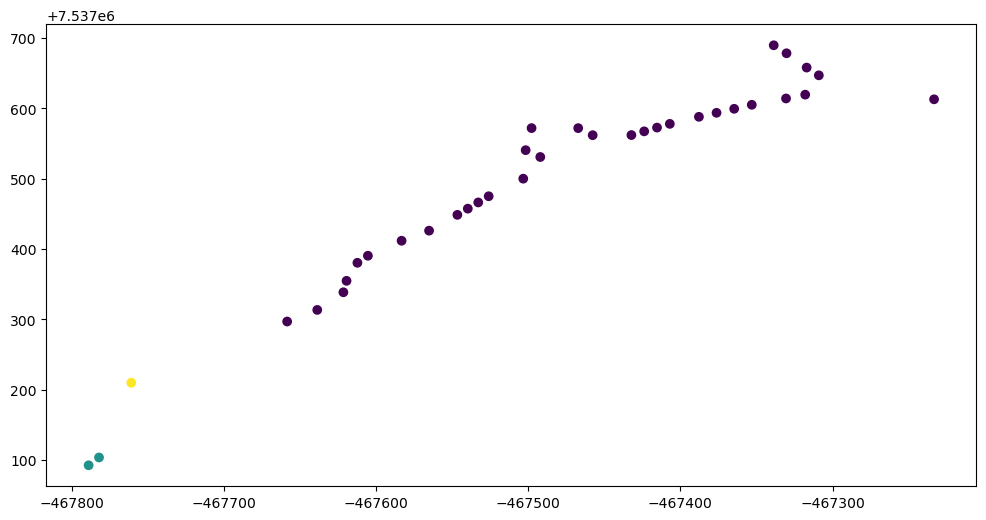

In [202]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(x=gdf['x'], y=gdf['y'], c=gdf['cluster'])



In [203]:
from sklearn.metrics import silhouette_score as ss

In [204]:
ss(X, gdf['cluster'])

0.48219567970908084

In [205]:
gdf_0=gdf[gdf['cluster']==0]

In [206]:
from shapely.geometry import MultiPoint

# take one cluster as example, generate the average centroind point for the cluster
# 'unary_union' combines all the points into a single MultiPoint geometry
average_point = gdf_0.geometry.unary_union.centroid 
# we can later use a for loop to generate data frame of cluster centroid

# get a GeoDataFrame of new centroid of cluster
geometry_0 = gpd.GeoSeries([average_point], crs=gdf.crs)
average_gdf = gpd.GeoDataFrame(geometry=geometry_0)


In [207]:
average_gdf

,geometry
0,POINT (-467463.802 7537521.840)


<Axes: >

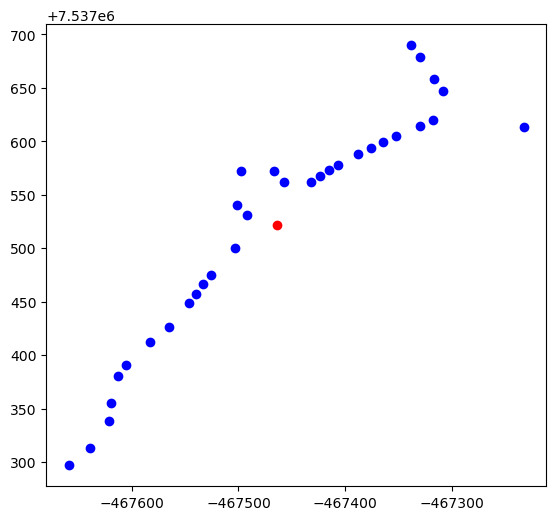

In [208]:
fig,ax=plt.subplots(figsize=(12,6))
average_gdf.plot(ax=ax,color='red')
gdf_0.plot(ax=ax,color='blue')

### 2.3 Calculate walking time in one OA

So what I need to do now is to seperate a output area, and see the amenities around. 
1. select one output area
2. generate a buffer for output area with a distance of 20*60s * 1.15m/s. So I could filter the potential amenities that are accessible within 20 minutes walking and I could reduce computation.
3. calculate real walking time based on road network.

In [220]:
# select a output area '4879'
#gdf=gla_simd_oa_resi[gla_simd_oa_resi['index_OA']==4879]
OA_4879=gla_simd_oa[gla_simd_oa.index==4879]

In [221]:
OA_4879

,all_residents,area_ha,density,geometry,index_DZ,DataZone,DZName,LAName,SAPE2017,WAPE2017,...,CrimeRank,HouseNumOC,HouseNumNC,HouseOCrat,HouseNCrat,HouseRank,Shape_Leng,Shape_Area,DataZone2011Code,UrbanRural6Fold2020Code
4879,76,2.78,27.3,"MULTIPOLYGON (((-467267.389 7537713.556, -4671...",449,S01010196,Balornock - 03,Glasgow City,661,416,...,1943.0,129,11,19%,2%,1155.0,2793.16368,345598.156621,S01010196,1


In [222]:
# generate a buffer of output area
buffer_distance = 20*60*1.15
buffered_polygon = OA_4879.buffer(buffer_distance)

# Create a new GeoDataFrame with the buffered polygon
buffer_gdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries(buffered_polygon), crs=OA_4879.crs)

In [223]:
# filter the amenities within the buffer
amenities_4879 = gpd.sjoin(amenities,buffer_gdf[['geometry']], how='inner', rsuffix='4879',op='within')

In [224]:
from matplotlib.colors import ListedColormap

Text(0.95, 0.84, 'N')

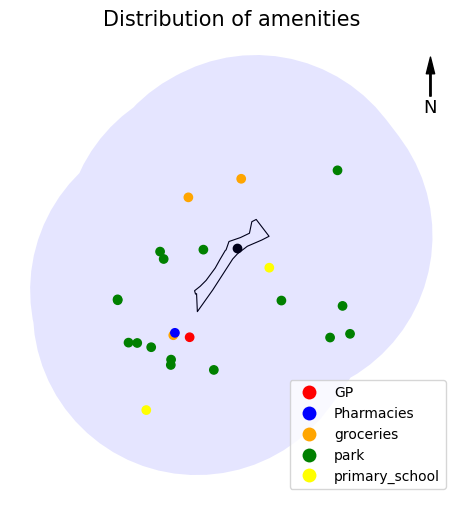

In [225]:
fig,ax=plt.subplots(figsize=(12,6))
OA_4879.plot(ax=ax,color='white', edgecolor='black',linewidth=0.8)
average_gdf.plot(ax=ax,color='black')
buffer_gdf.plot(ax=ax,color='blue',alpha=0.1)


category_colors = {'primary_scool': 'red', 'groceries': 'blue', 'GP': 'orange', 'park': 'green','Pharmacies':'yellow'} 
cmap = ListedColormap(category_colors.values())
# amenities_4879.plot(ax=ax, alpha=0.3, markersize=5)
amenities_4879.plot(ax=ax, column='category', cmap=cmap, legend=True, legend_kwds={'loc': 'lower right'})




# primary_scool_gla.plot(ax=ax, color="red", markersize=1)
# groceries_gla.plot(ax=ax, color="blue", markersize=1)
# GP_gla.plot(ax=ax, color="orange", markersize=1)
# park_gla.plot(ax=ax, color="green", markersize=1)
# Pharmacies_gla.plot(ax=ax, color="yellow", markersize=1)
ax.set_title('Distribution of amenities', fontsize=15)
ax.set_axis_off()
x, y, arrow_length = 0.95, 0.95, 0.11
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=1, headwidth=6),
            ha='center', va='center', fontsize=13,
            xycoords=ax.transAxes)

关关难过关关过

In [226]:
# Ignore some unnecessary warnings
import warnings
warnings.simplefilter('ignore')

In [227]:
%%time
import sys
# To increase the speed with local computer increase the amount of memory e.g. to 8 GB
sys.argv.append(["--max-memory", "6G"])
from r5py import TransportNetwork, TravelTimeMatrixComputer, TransitMode, LegMode
# Filepath to OSM data
osm_fp = "data/Glasgow.osm.pbf"
transport_network = TransportNetwork(osm_fp)

CPU times: user 12.3 s, sys: 590 ms, total: 12.9 s
Wall time: 4.03 s


In [228]:
type(transport_network)

r5py.r5.transport_network.TransportNetwork

In [229]:
average_gdf['id'] = range(len(average_gdf))

In [230]:
amenities_4879['id']=range(len(amenities_4879))

In [231]:
average_gdf=average_gdf.to_crs(epsg=4326)
amenities_4879=amenities_4879.to_crs(epsg=4326)

In [232]:
travel_time_matrix_computer = TravelTimeMatrixComputer(
    transport_network,
    origins=average_gdf,
    destinations=amenities_4879,
    transport_modes=[LegMode.WALK],
    speed_walking = 4.14)

travel_time_matrix = travel_time_matrix_computer.compute_travel_times()


In [233]:
travel_time_matrix

,from_id,to_id,travel_time
0,0,0,10
1,0,1,22
2,0,2,7
3,0,3,8
4,0,4,8
5,0,5,7
6,0,6,10
7,0,7,10
8,0,8,11
9,0,9,11


In [234]:
amenities_4879_time = pd.merge(amenities_4879, travel_time_matrix,left_on="id", right_on="to_id" )

In [235]:
amenities_4879_time

,category,index_ori,ref_no,name,pointx_class,groupname,categoryname,classname,feature_easting,feature_northing,...,local_auth,la_s_code,id,accessType,refToGSite,trade_name,index_4879,from_id,to_id,travel_time
0,primary_school,115,43502581.0,Wallacewell Primary School,05310375,Education and Health,"Primary, Secondary and Tertiary Education","First, Primary and Infant Schools",262719.0,668951.0,...,NaN,NaN,0,NaN,NaN,NaN,4879,0,0,10
1,primary_school,151,43502620.0,St Catherine's Primary School,05310375,Education and Health,"Primary, Secondary and Tertiary Education","First, Primary and Infant Schools",262116.0,668298.0,...,NaN,NaN,1,NaN,NaN,NaN,4879,0,1,22
2,groceries,3345,165765412.0,Shop Local,09470699,Retail,"Food, Drink and Multi Item Retail",Convenience Stores and Independent Supermarkets,262347.0,669295.0,...,NaN,NaN,2,NaN,NaN,NaN,4879,0,2,7
3,groceries,3660,76242609.0,Aldi,09470819,Retail,"Food, Drink and Multi Item Retail",Supermarket Chains,262599.5,669374.6,...,NaN,NaN,3,NaN,NaN,NaN,4879,0,3,8
4,groceries,3699,108321049.0,The Co-operative,09470819,Retail,"Food, Drink and Multi Item Retail",Supermarket Chains,262255.0,668647.0,...,NaN,NaN,4,NaN,NaN,NaN,4879,0,4,8
5,GP,426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Glasgow City,S12000049,5,NaN,NaN,NaN,4879,0,5,7
6,park,15946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6,Pedestrian,F340863A-6594-7DA2-E053-AAEFA00AB6EA,NaN,4879,0,6,10
7,park,15947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7,Pedestrian,F340863A-6594-7DA2-E053-AAEFA00AB6EA,NaN,4879,0,7,10
8,park,15949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8,Pedestrian,F34085B4-6890-7DA2-E053-AAEFA00AB6EA,NaN,4879,0,8,11
9,park,15950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9,Pedestrian,F34085B4-6890-7DA2-E053-AAEFA00AB6EA,NaN,4879,0,9,11


In [236]:
# the minimum time for accessing 5 types of amenities respectively
min_time_1=amenities_4879_time.groupby('category')['travel_time'].min()

In [237]:
min_time_1

category
GP                 7
Pharmacies         7
groceries          7
park               4
primary_school    10
Name: travel_time, dtype: int64

In [238]:
max_time_2=min_time_1.max()

In [239]:
# the maximum time for residents living in the residential cluster 1 is 10min.
max_time_2

10

## 4. Compute accessibility of all output area and data zone in Glasgow

### 4.1 Utilizing DBSCAN to identify cluster within OA 

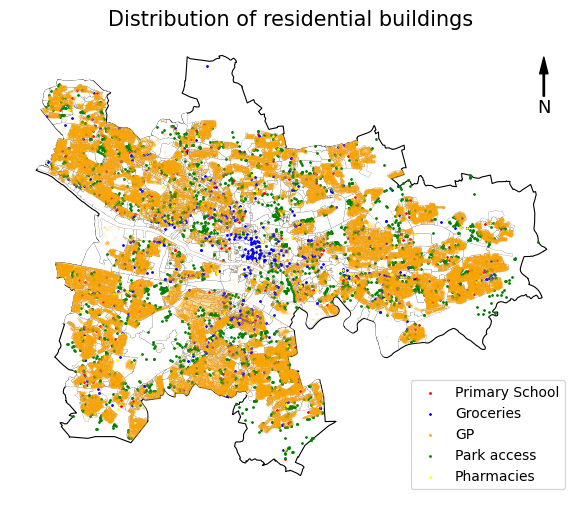

In [358]:

fig,ax=plt.subplots(figsize=(12,6))
gla_boundary.plot(ax=ax,color='white', edgecolor='black',linewidth=0.8)
gla_simd_oa_travel.plot(ax=ax,color='white', edgecolor='black',linewidth=0.1)
# edges.plot(ax=ax, edgecolor='black',linewidth=0.1,alpha=0.5)
primary_scool_gla.plot(ax=ax, color="red", markersize=1)
groceries_gla.plot(ax=ax, color="blue", markersize=1)
GP_gla.plot(ax=ax, color="orange", markersize=1)
park_gla.plot(ax=ax, color="green", markersize=1)
Pharmacies_gla.plot(ax=ax, color="yellow", markersize=1)
gla_simd_oa_resi.plot(ax=ax,color='orange',marker='.',markersize=0.1,alpha=0.5)


# buffered_polygon.plot(ax=ax,color='blue',alpha=0.3)
ax.set_title('Distribution of residential buildings', fontsize=15)
ax.set_axis_off()
x, y, arrow_length = 0.95, 0.95, 0.11
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=1, headwidth=6),
            ha='center', va='center', fontsize=13,
            xycoords=ax.transAxes)
ax.legend(['Primary School', 'Groceries', 'GP', 'Park access', 'Pharmacies'], loc='lower right')

In [240]:
OA_list=gla_simd_oa_resi['index_OA'].unique().tolist()
OA_cluster = gpd.GeoDataFrame()
for index_OA in OA_list:
    OA = gla_simd_oa_resi[gla_simd_oa_resi['index_OA'] == index_OA]
    # get the specific OA and residential buildins within this OA
    OA['x'] = OA.geometry.x
    OA['y'] = OA.geometry.y
    OA['buffer'] = OA.geometry.buffer(100) # 100 buffer for selecting potential amenities points
    long_lat = OA[['x', 'y']]
    X = long_lat.to_numpy()
    dbscan_cluster_model = DBSCAN(eps=100, min_samples=1).fit(X) # 100m as threshold distance
    OA['cluster'] = dbscan_cluster_model.labels_
    # have already indentified buildings in each OA into clusters
    OA_cluster = gpd.GeoDataFrame(pd.concat([OA_cluster,OA]))

In [241]:
# the maximum cluster number is 20 within one OA
OA_cluster['cluster'].max()

20

In [242]:
# residential buildings are seperated to different groups
OA_cluster.groupby('index_OA')['cluster'].head(20)

1         0
11375     1
11580     0
16578     0
18100     1
         ..
151130    0
151712    0
152412    0
152769    0
153119    0
Name: cluster, Length: 70885, dtype: int64

In [243]:
OA_cluster.geometry

1         POINT (-467605.325 7537390.422)
11375     POINT (-467781.986 7537103.662)
11580     POINT (-467364.676 7537599.318)
16578     POINT (-467330.604 7537614.008)
18100     POINT (-467788.821 7537092.552)
                       ...               
151130    POINT (-474337.044 7534119.634)
151712    POINT (-473032.573 7530339.834)
152412    POINT (-473540.480 7529744.375)
152769    POINT (-481291.382 7536485.171)
153119    POINT (-476922.696 7533063.542)
Name: center, Length: 135560, dtype: geometry

In [244]:
# set geometry for GeoDataFrame
OA_cluster['geometry']=OA_cluster.geometry

In [245]:
# simplify GeoDataFrame
OA_simple = OA_cluster[['index_OA','cluster','geometry']]

In [246]:
OA_simple

,index_OA,cluster,geometry
1,4879,0,POINT (-467605.325 7537390.422)
11375,4879,1,POINT (-467781.986 7537103.662)
11580,4879,0,POINT (-467364.676 7537599.318)
16578,4879,0,POINT (-467330.604 7537614.008)
18100,4879,1,POINT (-467788.821 7537092.552)
...,...,...,...
151130,4567,0,POINT (-474337.044 7534119.634)
151712,7879,0,POINT (-473032.573 7530339.834)
152412,584,0,POINT (-473540.480 7529744.375)
152769,6736,0,POINT (-481291.382 7536485.171)


### 4.2 Get centroid point of residential clusters within OA

In [247]:
# generate centroid point for each residential clustering
average_point_gdf = gpd.GeoDataFrame()

for index_OA in OA_list:
    OA_index = OA_simple[OA_simple['index_OA'] == index_OA]
    OA_index = OA_index.set_geometry('geometry')
    aggregated_gdf = OA_index.dissolve(by='cluster')
    aggregated_gdf['geometry'] = aggregated_gdf.geometry.centroid
    average_point_gdf = gpd.GeoDataFrame(pd.concat([average_point_gdf, aggregated_gdf]))

average_point_gdf.set_geometry('geometry', inplace=True)

### 4.3 Calculate travel time from each centroid to amenities

#### 4.3.1 Test the for loop code using one specific OA

In [249]:
# test for one OA
buffer_distance = 20*60*1.15
amenities_buffer = gpd.GeoDataFrame()
OA_average_travel_time = pd.DataFrame()
OA_list_test =[4879.0]
for index_OA in OA_list_test:
    OA = gla_simd_oa[gla_simd_oa.index==index_OA] # get the specific OA
    buffer = OA.buffer(buffer_distance) # get the buffer of the OA
    buffer = gpd.GeoDataFrame(geometry=gpd.GeoSeries(buffer), crs=gla_simd_oa.crs) #transfer the buffer into GeoDataFrame
    buffer_amenities = gpd.sjoin(amenities,buffer[['geometry']], how='inner', rsuffix=index_OA,op='within') 
    # get the amenities within that buffer
    buffer_amenities['id']=range(len(buffer_amenities))
    OA_centroid = average_point_gdf[average_point_gdf["index_OA"]==index_OA]
    OA_centroid['id']=range(len(OA_centroid))
    
    # get travel time from centorid point to amenities
    # transfer the projection before calculate
    OA_centroid=OA_centroid.to_crs(epsg=4326)
    buffer_amenities=buffer_amenities.to_crs(epsg=4326)
    travel_time_matrix_computer = TravelTimeMatrixComputer(
    transport_network,
    origins=OA_centroid,
    destinations=buffer_amenities,
    transport_modes=[LegMode.WALK],
    speed_walking = 4.14)
    travel_time_matrix = travel_time_matrix_computer.compute_travel_times()
    
    # merge other fields of points together
    amenities_centroid_time = pd.merge(buffer_amenities, travel_time_matrix,left_on="id", right_on="to_id" )
    
    # get theh dataframe of the travel time grouped by cluster and types of amenities
    # calculate the minimum travel time to each kind of amenitis
    min_time_1=amenities_centroid_time.groupby(['from_id','category'])['travel_time'].min()
    
    # from the minimum travel time, get the maximum travel time, which is considered the farest amenity
    max_time = min_time_1.groupby('from_id').max()
    
    # calculate the average of maximum travel time of all cluster within OA
    average_max_time=max_time.mean()
    
    # create a new dataframe to store the information of output area and average travel time
    new_row = {'OA_index':index_OA,'average_travel_time':average_max_time}
    OA_average_travel_time = pd.concat([OA_average_travel_time, pd.DataFrame([new_row])], ignore_index=True)

    

In [250]:
travel_time_matrix

,from_id,to_id,travel_time
0,0,0,10
1,0,1,22
2,0,2,7
3,0,3,8
4,0,4,8
...,...,...,...
18,2,18,15
19,2,19,16
20,2,20,15
21,2,21,16


In [251]:
amenities_centroid_time

,category,index_ori,ref_no,name,pointx_class,groupname,categoryname,classname,feature_easting,feature_northing,...,local_auth,la_s_code,id,accessType,refToGSite,trade_name,index_4879.0,from_id,to_id,travel_time
0,primary_school,115,43502581.0,Wallacewell Primary School,05310375,Education and Health,"Primary, Secondary and Tertiary Education","First, Primary and Infant Schools",262719.0,668951.0,...,NaN,NaN,0,NaN,NaN,NaN,4879,0,0,10
1,primary_school,115,43502581.0,Wallacewell Primary School,05310375,Education and Health,"Primary, Secondary and Tertiary Education","First, Primary and Infant Schools",262719.0,668951.0,...,NaN,NaN,0,NaN,NaN,NaN,4879,1,0,11
2,primary_school,115,43502581.0,Wallacewell Primary School,05310375,Education and Health,"Primary, Secondary and Tertiary Education","First, Primary and Infant Schools",262719.0,668951.0,...,NaN,NaN,0,NaN,NaN,NaN,4879,2,0,13
3,primary_school,151,43502620.0,St Catherine's Primary School,05310375,Education and Health,"Primary, Secondary and Tertiary Education","First, Primary and Infant Schools",262116.0,668298.0,...,NaN,NaN,1,NaN,NaN,NaN,4879,0,1,22
4,primary_school,151,43502620.0,St Catherine's Primary School,05310375,Education and Health,"Primary, Secondary and Tertiary Education","First, Primary and Infant Schools",262116.0,668298.0,...,NaN,NaN,1,NaN,NaN,NaN,4879,1,1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,park,17773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21,Pedestrian,F340858D-458A-7DA2-E053-AAEFA00AB6EA,NaN,4879,1,21,16
65,park,17773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21,Pedestrian,F340858D-458A-7DA2-E053-AAEFA00AB6EA,NaN,4879,2,21,16
66,Pharmacies,692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Glasgow City,S12000049,22,NaN,NaN,Willis Pharmacy,4879,0,22,7
67,Pharmacies,692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Glasgow City,S12000049,22,NaN,NaN,Willis Pharmacy,4879,1,22,3


In [252]:
min_time_1

from_id  category      
0        GP                 7
         Pharmacies         7
         groceries          7
         park               4
         primary_school    10
1        GP                 3
         Pharmacies         3
         groceries          3
         park               5
         primary_school    11
2        GP                 4
         Pharmacies         4
         groceries          4
         park               6
         primary_school    13
Name: travel_time, dtype: int64

In [253]:
max_time

from_id
0    10
1    11
2    13
Name: travel_time, dtype: int64

In [254]:
average_max_time

11.333333333333334

In [255]:
OA_average_travel_time

,OA_index,average_travel_time
0,4879.0,11.333333


#### 4.3.2 Calculate travel time for all centroids from amenities

When the amenities within 20 minutes walking are not comprehensive, the travel time is defined as null. Null value indicate that the cluster of residential buildings has no accessibility to all kinds of necessary amenities.

In [285]:
%%time
import sys
# To increase the speed with local computer increase the amount of memory e.g. to 8 GB
sys.argv.append(["--max-memory", "6G"])

buffer_distance = 20*60*1.15
amenities_buffer = gpd.GeoDataFrame()
OA_average_travel_time_all = pd.DataFrame()

for index_OA in OA_list:
    OA = gla_simd_oa[gla_simd_oa.index==index_OA] # get the specific OA
    buffer = OA.buffer(buffer_distance) # get the buffer of the OA
    buffer = gpd.GeoDataFrame(geometry=gpd.GeoSeries(buffer), crs=gla_simd_oa.crs) #transfer the buffer into GeoDataFrame
    buffer_amenities = gpd.sjoin(amenities,buffer[['geometry']], how='inner', rsuffix=index_OA,op='within') 
    # get the amenities within that buffer
    buffer_amenities['id']=range(len(buffer_amenities))
    OA_centroid = average_point_gdf[average_point_gdf["index_OA"]==index_OA]
    OA_centroid['id']=range(len(OA_centroid))
    
    # get travel time from centorid point to amenities
    # transfer the projection before calculate
    OA_centroid=OA_centroid.to_crs(epsg=4326)
    buffer_amenities=buffer_amenities.to_crs(epsg=4326)
    travel_time_matrix_computer = TravelTimeMatrixComputer(
    transport_network,
    origins=OA_centroid,
    destinations=buffer_amenities,
    transport_modes=[LegMode.WALK],
    speed_walking = 4.14)
    travel_time_matrix = travel_time_matrix_computer.compute_travel_times()
    
    # merge other fields of points together
    amenities_centroid_time = pd.merge(buffer_amenities, travel_time_matrix,left_on="id", right_on="to_id" )
    
    # get theh dataframe of the travel time grouped by cluster and types of amenities
    # calculate the minimum travel time to each kind of amenitis
    min_time_1=amenities_centroid_time.groupby(['from_id','category'])['travel_time'].min()
    # if the accessible amenities do not include all 5 types, it indicates that the accessibility is not comprehensive
    if amenities_centroid_time['category'].nunique() == 5:
        # from the minimum travel time, get the maximum travel time, which is considered the farest amenity
        max_time = min_time_1.groupby('from_id').max()

        # calculate the average of maximum travel time of all cluster within OA
        average_max_time=max_time.mean()

        # create a new dataframe to store the information of output area and average travel time
        new_row = {'OA_index':index_OA,'average_travel_time':average_max_time}
    else:    
        new_row = {'OA_index':index_OA,'average_travel_time':np.nan}
 
    OA_average_travel_time_all = pd.concat([OA_average_travel_time_all, pd.DataFrame([new_row])], ignore_index=True)

    

CPU times: user 40min 28s, sys: 2min 1s, total: 42min 30s
Wall time: 26min 38s


In [286]:
min_time_1

from_id  category      
0        GP                3
         Pharmacies        8
         groceries         1
         park              2
         primary_school    3
Name: travel_time, dtype: int64

In [287]:
OA_centroid

,geometry,index_OA,id
cluster,,,
0,POINT (-4.28427 55.87244),3237,0


In [298]:
OA_average_travel_time_all

,OA_index,average_travel_time
0,4879,11.333333
1,4693,18.000000
2,6167,11.000000
3,6248,NaN
4,7354,NaN
...,...,...
5097,4567,13.000000
5098,7879,NaN
5099,584,NaN
5100,6736,11.000000


Notice that we lost 300 rows in this dataframe

#### 4.3.3 Complete dataframe when some OA have no residential buildings

In [308]:
# notice that some of the output area have residential buildings but with located population
OA_null=gla_simd_oa_travel_all[~gla_simd_oa_travel_all['index'].isin(OA_average_travel_time_all['OA_index'].tolist())]

In [310]:
OA_null.shape

(301, 61)

In [311]:
# get the list of OA index
null_OA_list = OA_null['index'].tolist()

In [314]:
# use the centroid of the output area to calculate the average travel time of those output area
%%time
import sys
# To increase the speed with local computer increase the amount of memory e.g. to 8 GB
sys.argv.append(["--max-memory", "6G"])

buffer_distance = 20*60*1.15
amenities_buffer = gpd.GeoDataFrame()
OA_average_travel_time_null = pd.DataFrame()

for index_OA in null_OA_list:
    OA = gla_simd_oa[gla_simd_oa.index==index_OA] # get the specific OA
    buffer = OA.buffer(buffer_distance) # get the buffer of the OA
    buffer = gpd.GeoDataFrame(geometry=gpd.GeoSeries(buffer), crs=gla_simd_oa.crs) #transfer the buffer into GeoDataFrame
    buffer_amenities = gpd.sjoin(amenities,buffer[['geometry']], how='inner', rsuffix=index_OA,op='within') 
    # get the amenities within that buffer
    buffer_amenities['id']=range(len(buffer_amenities))
    OA_centroid = gpd.GeoDataFrame({"geometry": gla_simd_oa.geometry.centroid, "index_OA": index_OA, "id": [0]}, index=[0])

    
    # get travel time from centorid point to amenities
    # transfer the projection before calculate
    OA_centroid=OA_centroid.to_crs(epsg=4326)
    buffer_amenities=buffer_amenities.to_crs(epsg=4326)
    travel_time_matrix_computer = TravelTimeMatrixComputer(
    transport_network,
    origins=OA_centroid,
    destinations=buffer_amenities,
    transport_modes=[LegMode.WALK],
    speed_walking = 4.14)
    travel_time_matrix = travel_time_matrix_computer.compute_travel_times()
    
    # merge other fields of points together
    amenities_centroid_time = pd.merge(buffer_amenities, travel_time_matrix,left_on="id", right_on="to_id" )
    
    # get theh dataframe of the travel time grouped by cluster and types of amenities
    # calculate the minimum travel time to each kind of amenitis
    min_time_1=amenities_centroid_time.groupby('category')['travel_time'].min()
    if amenities_centroid_time['category'].nunique() == 5:
         # from the minimum travel time, get the maximum travel time, which is considered the farest amenity
        max_time = min_time_1.max()

        # create a new dataframe to store the information of output area and average travel time
        new_row = {'OA_index':index_OA,'average_travel_time':max_time}
        OA_average_travel_time_null = pd.concat([OA_average_travel_time_null, pd.DataFrame([new_row])], ignore_index=True)
    else:
        new_row = {'OA_index':index_OA,'average_travel_time':np.nan}
        OA_average_travel_time_null = pd.concat([OA_average_travel_time_null, pd.DataFrame([new_row])], ignore_index=True)

    
   

CPU times: user 2min 24s, sys: 8.3 s, total: 2min 32s
Wall time: 1min 37s


In [322]:
# concat the complementary dataframe with the information of travel time
gla_simd_oa.reset_index(inplace=True)

OA_average_travel_time_all_concat = pd.concat([OA_average_travel_time_all,OA_average_travel_time_null])

In [323]:
OA_average_travel_time_all_concat

,OA_index,average_travel_time
0,4879,11.333333
1,4693,18.000000
2,6167,11.000000
3,6248,NaN
4,7354,NaN
...,...,...
296,6220,NaN
297,7727,NaN
298,7728,NaN
299,6415,NaN


In [324]:
# merge dataframe with information of travel time with GeoDataFrame
gla_simd_oa_travel_all=pd.merge(gla_simd_oa,OA_average_travel_time_all_concat,left_on='index',right_on='OA_index',how='left')

In [330]:
gla_simd_oa_travel_all['average_travel_time'].isnull().sum()
# 1261 Output Area has no accessibility to all kinds of amenities within 20 minute walk

1261

## 5 Visualizing the result

### 5.1 Glasgow Output Area average travel time

In [351]:
gla_simd_oa_20 = gla_simd_oa_travel_all[gla_simd_oa_travel_all['average_travel_time']<=20]
gla_simd_oa_out_20 = gla_simd_oa_travel_all[
    (gla_simd_oa_travel_all['average_travel_time']>20)|(gla_simd_oa_travel_all['average_travel_time'].isna())]

In [425]:
inaccessible_pop = gla_simd_oa_out_20['all_residents'].sum()
print(inaccessible_pop, 'residents living in Glasgow can not access all necessary amenities by 20 minutes walk')

157394 residents living in Glasgow can not access all necessary amenities by 20 minutes walk


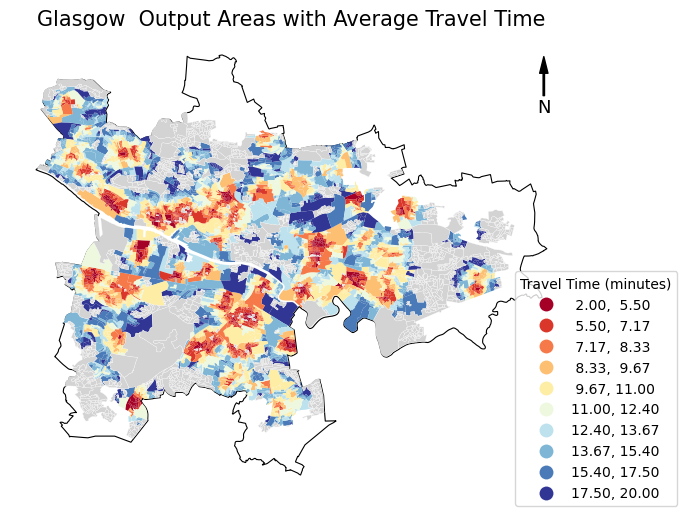

In [374]:
g,ax=plt.subplots(figsize=(12,6))
gla_boundary.plot(ax=ax,color='white', edgecolor='black',linewidth=0.8)
gla_simd_oa_20_plot = gla_simd_oa_20.plot(ax=ax,column="average_travel_time", 
                                          cmap="RdYlBu", scheme="natural_breaks", k=10, 
                                          legend=True)
gla_simd_oa_out_20.plot(ax=ax,color='lightgray',edgecolor='white',linewidth=0.2)

ax.set_title('Glasgow  Output Areas with Average Travel Time', fontsize=15)
ax.set_axis_off()
x, y, arrow_length = 0.95, 0.95, 0.11
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=1, headwidth=6),
            ha='center', va='center', fontsize=13,
            xycoords=ax.transAxes)

# Add a title for the legend
legend_title = 'Travel Time (minutes)'
gla_simd_oa_20_plot.get_legend().set_title(legend_title)

gla_simd_oa_20_plot.get_legend().set_bbox_to_anchor((1.2,0.5))

# Show the plot
plt.show()

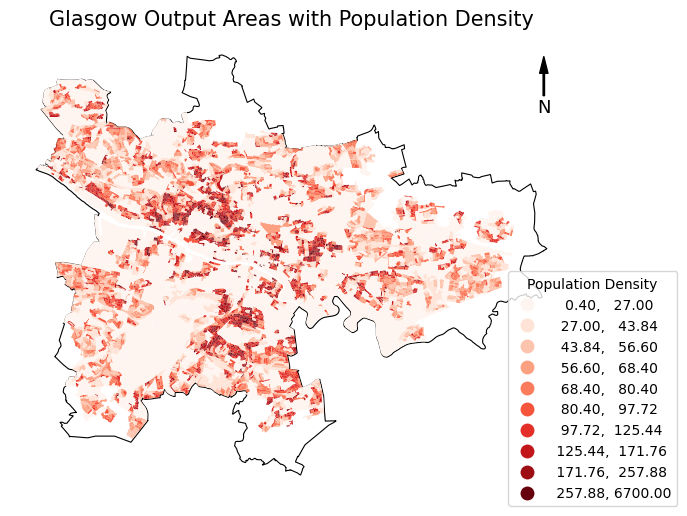

In [379]:
# distribution of population

g,ax=plt.subplots(figsize=(12,6))
gla_boundary.plot(ax=ax,color='white', edgecolor='black',linewidth=0.8)
gla_simd_oa_travel_all_plot=gla_simd_oa_travel_all.plot(ax=ax,column="density", 
                                          cmap="Reds", scheme="quantiles", k=10, 
                                          legend=True)

ax.set_title('Glasgow Output Areas with Population Density', fontsize=15)
ax.set_axis_off()
x, y, arrow_length = 0.95, 0.95, 0.11
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=1, headwidth=6),
            ha='center', va='center', fontsize=13,
            xycoords=ax.transAxes)

# Add a title for the legend
legend_title = 'Population Density'
gla_simd_oa_travel_all_plot.get_legend().set_title(legend_title)

gla_simd_oa_travel_all_plot.get_legend().set_bbox_to_anchor((1.2,0.5))

# Show the plot
plt.show()

### 5.2 Distribution of percentage of population can access amenities within 20min

In [332]:
dz_list = gla_simd_oa_travel_all['DataZone'].unique().tolist()

In [333]:
per_pop_20min = pd.DataFrame()
for dz in dz_list:
    datazone = gla_simd_oa_travel[gla_simd_oa_travel['DataZone']==dz]
    sum_pop = datazone['all_residents'].sum()
    OA_accessible = datazone[datazone['average_travel_time'].notna()]
    OA_accessible = OA_accessible[OA_accessible['average_travel_time']<= 20]
    sum_pop_acc = OA_accessible['all_residents'].sum()
    per_acc = round(sum_pop_acc/sum_pop,2)
    new_row = {'Datazone':dz,'percentage_of_pop':per_acc}
    per_pop_20min = pd.concat([per_pop_20min, pd.DataFrame([new_row])], ignore_index=True)
    

In [340]:
per_pop_20min

,Datazone,percentage_of_pop
0,S01010362,0.54
1,S01010028,1.00
2,S01010351,1.00
3,S01010206,0.00
4,S01010183,1.00
...,...,...
727,S01010289,1.00
728,S01009774,0.44
729,S01009773,0.20
730,S01010190,1.00


In [406]:
gla_simd_oa_travel_all_pop = pd.merge(gla_simd_oa,per_pop_20min,left_on='DataZone',right_on='Datazone',how='left')

In [407]:
gla_simd_oa_travel_all_pop

,index,all_residents,area_ha,density,geometry,index_DZ,DataZone,DZName,LAName,SAPE2017,...,HouseNumNC,HouseOCrat,HouseNCrat,HouseRank,Shape_Leng,Shape_Area,DataZone2011Code,UrbanRural6Fold2020Code,Datazone,percentage_of_pop
0,5,56,0.04,1400.0,"MULTIPOLYGON (((-478041.925 7535912.795, -4780...",617,S01010362,Wyndford - 05,Glasgow City,831,...,77,32%,10%,92.0,1366.469820,80326.479612,S01010362,1,S01010362,0.54
1,372,83,0.60,138.3,"MULTIPOLYGON (((-477812.746 7536057.997, -4777...",617,S01010362,Wyndford - 05,Glasgow City,831,...,77,32%,10%,92.0,1366.469820,80326.479612,S01010362,1,S01010362,0.54
2,1093,100,0.28,357.1,"MULTIPOLYGON (((-477855.521 7536163.617, -4778...",617,S01010362,Wyndford - 05,Glasgow City,831,...,77,32%,10%,92.0,1366.469820,80326.479612,S01010362,1,S01010362,0.54
3,3947,116,3.76,30.9,"MULTIPOLYGON (((-477762.928 7535897.314, -4777...",617,S01010362,Wyndford - 05,Glasgow City,831,...,77,32%,10%,92.0,1366.469820,80326.479612,S01010362,1,S01010362,0.54
4,5389,53,1.27,41.7,"MULTIPOLYGON (((-478083.574 7536011.531, -4782...",617,S01010362,Wyndford - 05,Glasgow City,831,...,77,32%,10%,92.0,1366.469820,80326.479612,S01010362,1,S01010362,0.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5398,7812,50,0.25,200.0,"MULTIPOLYGON (((-480377.268 7532188.849, -4803...",647,S01010392,Glasgow Harbour and Partick South - 05,Glasgow City,1015,...,2,21%,0%,1028.5,1440.220583,70579.603590,S01010392,1,S01010392,0.88
5399,7813,99,0.32,309.4,"MULTIPOLYGON (((-480250.516 7532096.865, -4801...",647,S01010392,Glasgow Harbour and Partick South - 05,Glasgow City,1015,...,2,21%,0%,1028.5,1440.220583,70579.603590,S01010392,1,S01010392,0.88
5400,7814,66,0.21,314.3,"MULTIPOLYGON (((-480218.229 7532153.615, -4802...",647,S01010392,Glasgow Harbour and Partick South - 05,Glasgow City,1015,...,2,21%,0%,1028.5,1440.220583,70579.603590,S01010392,1,S01010392,0.88
5401,7898,78,0.17,458.8,"MULTIPOLYGON (((-480326.619 7532165.041, -4803...",647,S01010392,Glasgow Harbour and Partick South - 05,Glasgow City,1015,...,2,21%,0%,1028.5,1440.220583,70579.603590,S01010392,1,S01010392,0.88


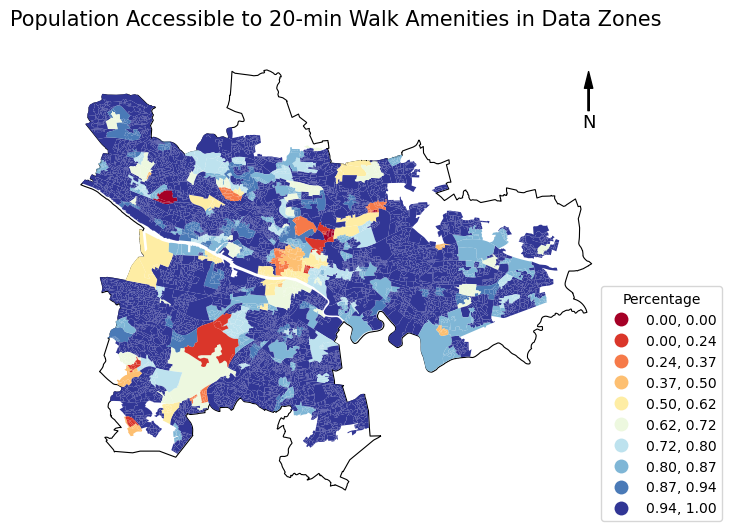

In [418]:
g,ax=plt.subplots(figsize=(12,6))
gla_boundary.plot(ax=ax,color='white', edgecolor='black',linewidth=0.8)
gla_simd_oa_travel_all_pop_plot=gla_simd_oa_travel_all_pop.plot(ax=ax,column="percentage_of_pop", cmap="RdYlBu", scheme="natural_breaks", k=10, legend=True)

ax.set_title('Population Accessible to 20-min Walk Amenities in Data Zones', fontsize=15)
ax.set_axis_off()
x, y, arrow_length = 0.95, 0.95, 0.11
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=1, headwidth=6),
            ha='center', va='center', fontsize=13,
            xycoords=ax.transAxes)

# Add a title for the legend
legend_title = 'Percentage'
gla_simd_oa_travel_all_pop_plot.get_legend().set_title(legend_title)

gla_simd_oa_travel_all_pop_plot.get_legend().set_bbox_to_anchor((1.2,0.5))

In [387]:
dz_pop_sum = gla_simd_oa_travel_all_pop.groupby('DataZone')['all_residents'].sum().reset_index(name='population_sum')

In [388]:
dz_pop_sum

,DataZone,population_sum
0,S01009758,598
1,S01009759,934
2,S01009760,893
3,S01009761,910
4,S01009762,926
...,...,...
727,S01010499,856
728,S01010500,1078
729,S01010501,928
730,S01010502,803


In [394]:
gla_simd_pop_2011 = pd.merge(gla_simd,dz_pop_sum,on='DataZone',how='left')

In [401]:
gla_simd_pop_2011['pop_density']=gla_simd_pop_2011['population_sum']/gla_simd_pop_2011['Shape_Area']*10000

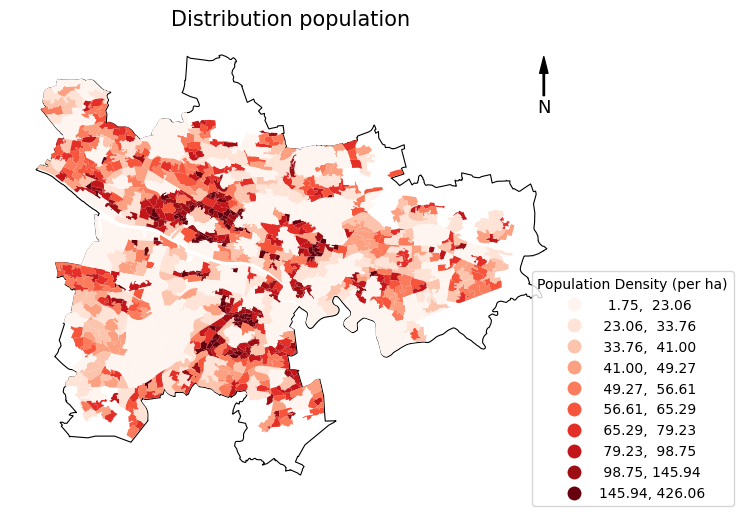

In [415]:
g,ax=plt.subplots(figsize=(12,6))
gla_boundary.plot(ax=ax,color='white', edgecolor='black',linewidth=0.8)
gla_simd_pop_2011_plot=gla_simd_pop_2011.plot(ax=ax,column="pop_density", cmap="Reds", scheme="quantiles", k=10, legend=True)

ax.set_title('Distribution population', fontsize=15)
ax.set_axis_off()
x, y, arrow_length = 0.95, 0.95, 0.11
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=1, headwidth=6),
            ha='center', va='center', fontsize=13,
            xycoords=ax.transAxes)

# Add a title for the legend
legend_title = 'Population Density (per ha)'
gla_simd_pop_2011_plot.get_legend().set_title(legend_title)

gla_simd_pop_2011_plot.get_legend().set_bbox_to_anchor((1.3,0.5))